In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

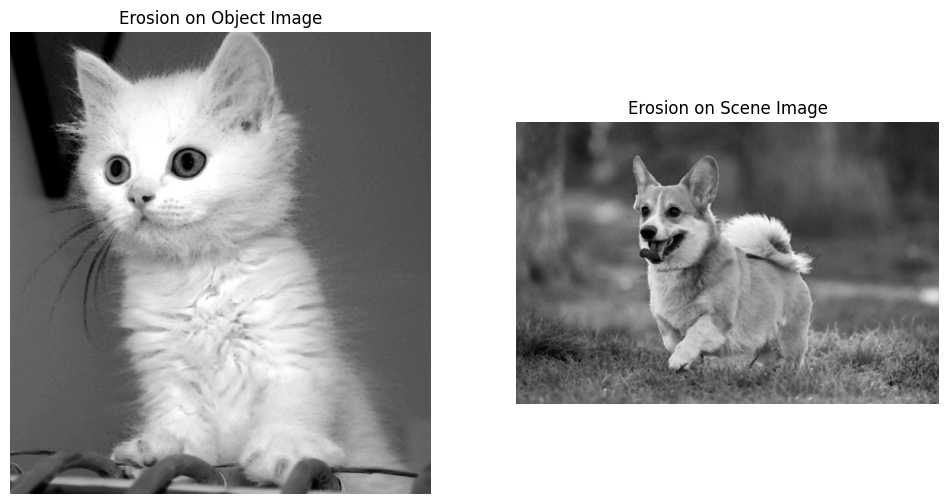

In [8]:
# Apply erosion to object_img
kernel = np.ones((5,5),np.uint8)
eroded_object = cv2.erode(object_img, kernel, iterations = 1)

# Apply erosion to scene_img
eroded_scene = cv2.erode(scene_img, kernel, iterations = 1)

# Display the eroded images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(eroded_object, cmap='gray')
plt.title("Erosion on Object Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(eroded_scene, cmap='gray')
plt.title("Erosion on Scene Image")
plt.axis("off")

plt.show()

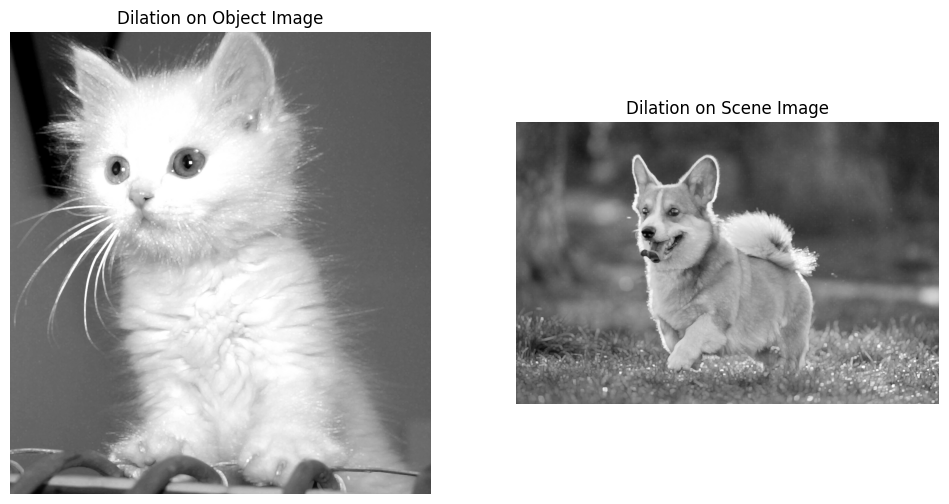

In [9]:
# Apply dilation to object_img
kernel = np.ones((5,5),np.uint8)
dilated_object = cv2.dilate(object_img, kernel, iterations = 1)

# Apply dilation to scene_img
dilated_scene = cv2.dilate(scene_img, kernel, iterations = 1)

# Display the dilated images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(dilated_object, cmap='gray')
plt.title("Dilation on Object Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(dilated_scene, cmap='gray')
plt.title("Dilation on Scene Image")
plt.axis("off")

plt.show()

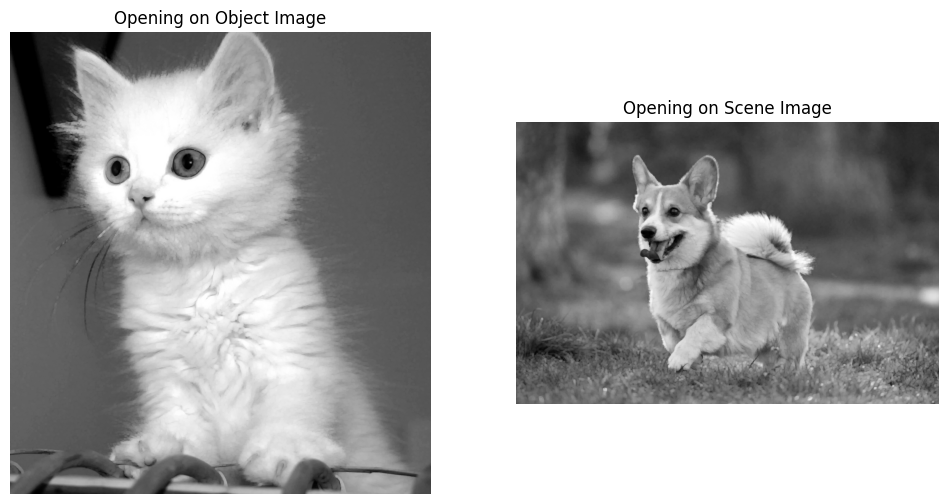

In [7]:
# Apply opening to object_img
kernel = np.ones((5,5),np.uint8)
opening_object = cv2.morphologyEx(object_img, cv2.MORPH_OPEN, kernel)

# Apply opening to scene_img
opening_scene = cv2.morphologyEx(scene_img, cv2.MORPH_OPEN, kernel)

# Display the opened images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(opening_object, cmap='gray')
plt.title("Opening on Object Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(opening_scene, cmap='gray')
plt.title("Opening on Scene Image")
plt.axis("off")

plt.show()

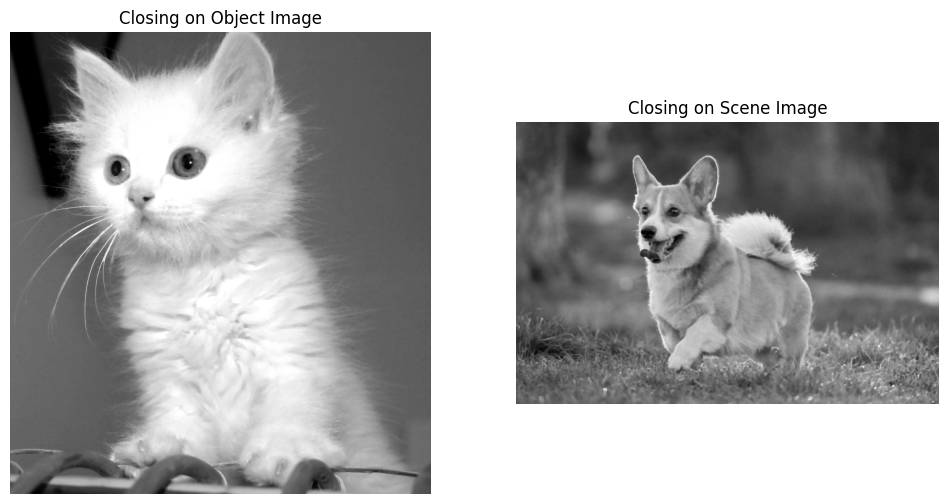

In [10]:
# Apply closing to object_img
kernel = np.ones((5,5),np.uint8)
closing_object = cv2.morphologyEx(object_img, cv2.MORPH_CLOSE, kernel)

# Apply closing to scene_img
closing_scene = cv2.morphologyEx(scene_img, cv2.MORPH_CLOSE, kernel)

# Display the closed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(closing_object, cmap='gray')
plt.title("Closing on Object Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(closing_scene, cmap='gray')
plt.title("Closing on Scene Image")
plt.axis("off")

plt.show()

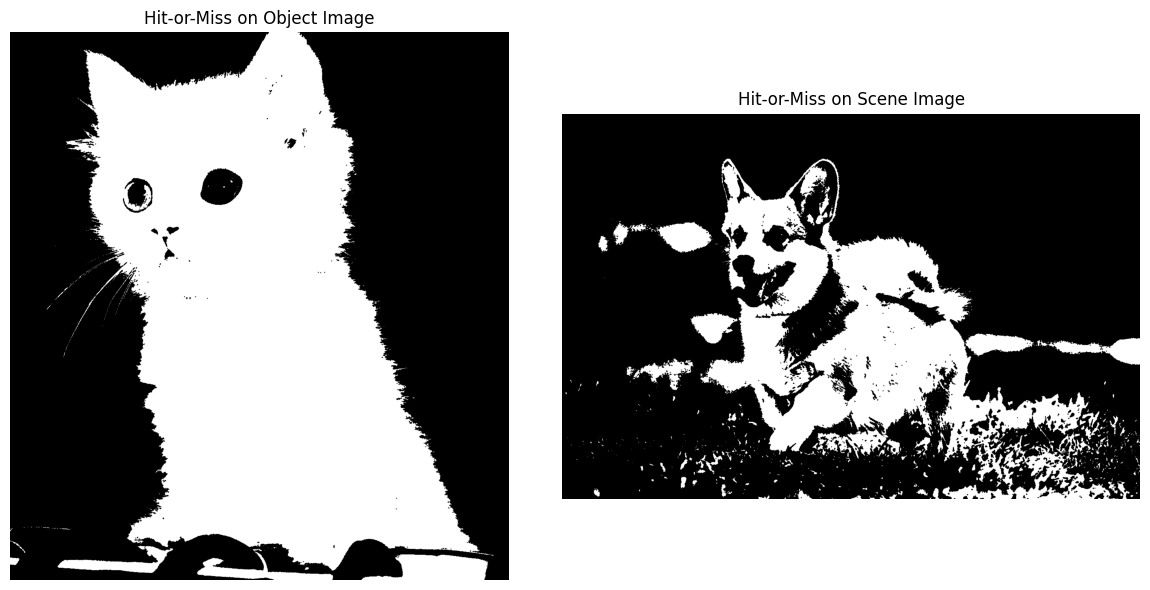

In [12]:
# Read the grayscale object and scene images
object_img = cv2.imread('cat.jpeg', cv2.IMREAD_GRAYSCALE)
scene_img = cv2.imread('cute.jpg', cv2.IMREAD_GRAYSCALE)

# Check if images loaded correctly
if object_img is None or scene_img is None:
    raise ValueError("Error loading images. Check the file paths.")

# Convert to binary using thresholding
_, binary_object = cv2.threshold(object_img, 127, 1, cv2.THRESH_BINARY)
_, binary_scene = cv2.threshold(scene_img, 127, 1, cv2.THRESH_BINARY)

# Define the Hit-or-Miss kernel
kernel_hit_or_miss = np.array([[0, 1, 0],
                               [1, 1, 1],
                               [0, 1, 0]], dtype=np.int8)

# Apply Hit-or-Miss transformation
hit_or_miss_object = cv2.morphologyEx(binary_object, cv2.MORPH_HITMISS, kernel_hit_or_miss)
hit_or_miss_scene = cv2.morphologyEx(binary_scene, cv2.MORPH_HITMISS, kernel_hit_or_miss)

# Multiply by 255 to display properly in grayscale
hit_or_miss_object_disp = hit_or_miss_object * 255
hit_or_miss_scene_disp = hit_or_miss_scene * 255

# Display results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(hit_or_miss_object_disp, cmap='gray')
plt.title("Hit-or-Miss on Object Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(hit_or_miss_scene_disp, cmap='gray')
plt.title("Hit-or-Miss on Scene Image")
plt.axis("off")

plt.tight_layout()
plt.show()


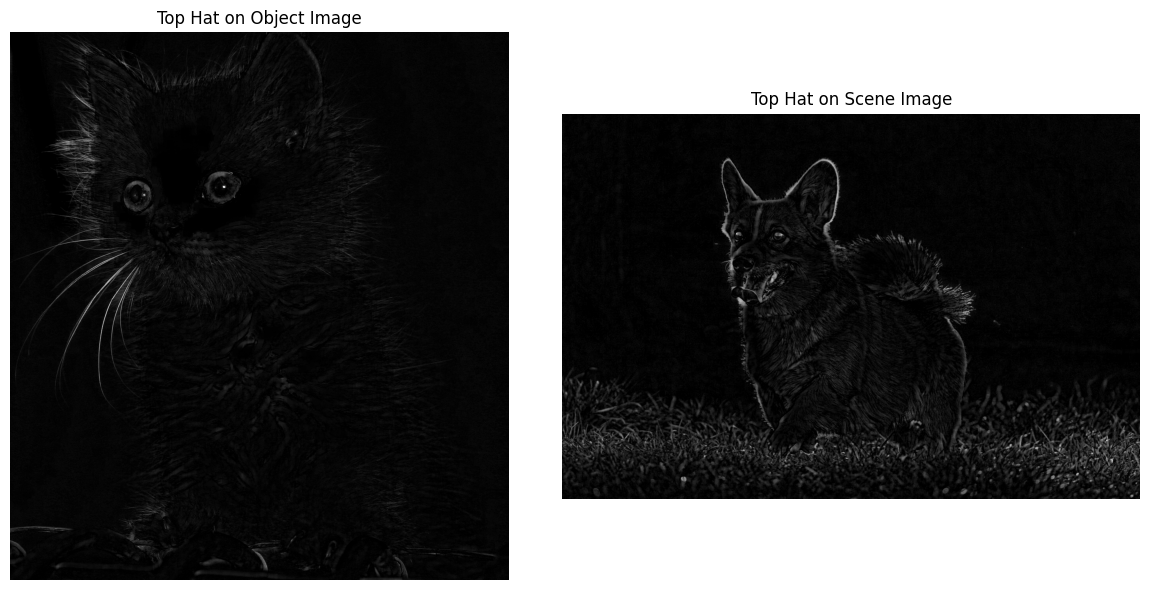

In [18]:
# Load grayscale images
object_img = cv2.imread('cat.jpeg', cv2.IMREAD_GRAYSCALE)
scene_img = cv2.imread('cute.jpg', cv2.IMREAD_GRAYSCALE)

# Check if images are loaded
if object_img is None or scene_img is None:
    raise ValueError("Error loading images. Please check the file paths.")

# Define kernel for morphological operation
kernel = np.ones((15, 15), np.uint8)

# Apply Top Hat transformation (highlights bright regions smaller than structuring element)
tophat_object = cv2.morphologyEx(object_img, cv2.MORPH_TOPHAT, kernel)
tophat_scene = cv2.morphologyEx(scene_img, cv2.MORPH_TOPHAT, kernel)

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(tophat_object, cmap='gray')
plt.title("Top Hat on Object Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(tophat_scene, cmap='gray')
plt.title("Top Hat on Scene Image")
plt.axis("off")

plt.tight_layout()
plt.show()


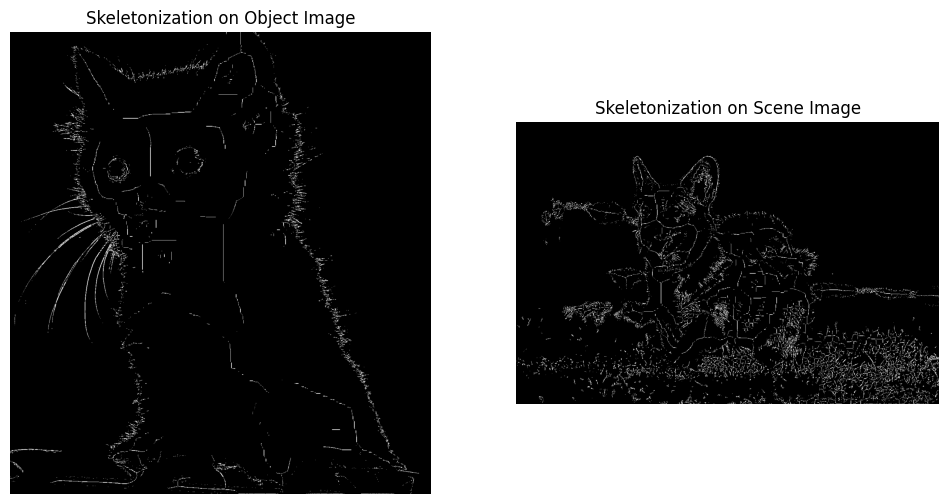

In [19]:
# Skeletonization requires binary images
# Convert to binary using thresholding
_, binary_object = cv2.threshold(object_img, 127, 255, cv2.THRESH_BINARY)
_, binary_scene = cv2.threshold(scene_img, 127, 255, cv2.THRESH_BINARY)

# Create an empty skeleton image
skeleton_object = np.zeros(binary_object.shape, np.uint8)
skeleton_scene = np.zeros(binary_scene.shape, np.uint8)

# Define the kernel for erosion and dilation
kernel = np.ones((3,3), np.uint8)

# Apply skeletonization iteratively
while True:
    eroded_object = cv2.erode(binary_object, kernel)
    temp_object = cv2.dilate(eroded_object, kernel)
    temp_object = cv2.subtract(binary_object, temp_object)
    skeleton_object = cv2.bitwise_or(skeleton_object, temp_object)
    binary_object = eroded_object.copy()

    if cv2.countNonZero(binary_object) == 0:
        break

while True:
    eroded_scene = cv2.erode(binary_scene, kernel)
    temp_scene = cv2.dilate(eroded_scene, kernel)
    temp_scene = cv2.subtract(binary_scene, temp_scene)
    skeleton_scene = cv2.bitwise_or(skeleton_scene, temp_scene)
    binary_scene = eroded_scene.copy()

    if cv2.countNonZero(binary_scene) == 0:
        break


# Display the skeletonized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(skeleton_object, cmap='gray')
plt.title("Skeletonization on Object Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(skeleton_scene, cmap='gray')
plt.title("Skeletonization on Scene Image")
plt.axis("off")

plt.show()

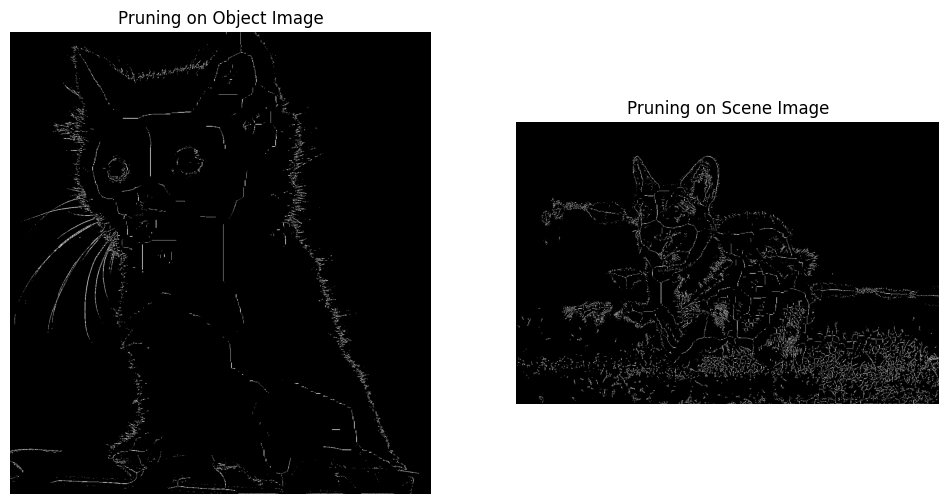

In [21]:
# Define kernels for pruning
# These are examples, you might need different kernels
kernel_endpoint1 = np.array([[0, 1, 0],
                             [0, 1, 0],
                             [1, 1, 1]], dtype=np.uint8)

kernel_endpoint2 = np.array([[1, 1, 0],
                             [1, 1, 1],
                             [1, 1, 0]], dtype=np.uint8)

# Add more kernels for other orientations
kernel_endpoint3 = np.rot90(kernel_endpoint1)
kernel_endpoint4 = np.rot90(kernel_endpoint2)
kernel_endpoint5 = np.rot90(kernel_endpoint3)
kernel_endpoint6 = np.rot90(kernel_endpoint4)
kernel_endpoint7 = np.rot90(kernel_endpoint5)
kernel_endpoint8 = np.rot90(kernel_endpoint6)


# Create copies of the skeletonized images for pruning
pruned_object = skeleton_object.copy()
pruned_scene = skeleton_scene.copy()

# Apply pruning iteratively (adjust the number of iterations as needed)
iterations = 5 # Example number of iterations

for _ in range(iterations):
    # Apply the endpoint removal kernels
    temp_object = cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint1)
    temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint2))
    temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint3))
    temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint4))
    temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint5))
    temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint6))
    temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint7))
    temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint8))


    # Remove the identified endpoints
    pruned_object = cv2.subtract(pruned_object, temp_object)

    # Do the same for the scene image
    temp_scene = cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint1)
    temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint2))
    temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint3))
    temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint4))
    temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint5))
    temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint6))
    temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint7))
    temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint8))

    pruned_scene = cv2.subtract(pruned_scene, temp_scene)


# Display the pruned images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(pruned_object, cmap='gray')
plt.title("Pruning on Object Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(pruned_scene, cmap='gray')
plt.title("Pruning on Scene Image")
plt.axis("off")

plt.show()

In [ ]:
import gradio as gr
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Make sure you have the images 'cat.jpeg' and 'cute.jpg' in the same directory

def apply_morphological_operation(object_img_path, scene_img_path, operation):
    # Load images
    object_img = cv2.imread(object_img_path, cv2.IMREAD_GRAYSCALE)
    scene_img = cv2.imread(scene_img_path, cv2.IMREAD_GRAYSCALE)

    if object_img is None or scene_img is None:
        return "Error: One or both images not found.", None, None

    kernel = np.ones((5,5), np.uint8)
    result_object = None
    result_scene = None

    if operation == "Erosion":
        result_object = cv2.erode(object_img, kernel, iterations=1)
        result_scene = cv2.erode(scene_img, kernel, iterations=1)
    elif operation == "Dilation":
        result_object = cv2.dilate(object_img, kernel, iterations=1)
        result_scene = cv2.dilate(scene_img, kernel, iterations=1)
    elif operation == "Opening":
        result_object = cv2.morphologyEx(object_img, cv2.MORPH_OPEN, kernel)
        result_scene = cv2.morphologyEx(scene_img, cv2.MORPH_OPEN, kernel)
    elif operation == "Closing":
        result_object = cv2.morphologyEx(object_img, cv2.MORPH_CLOSE, kernel)
        result_scene = cv2.morphologyEx(scene_img, cv2.MORPH_CLOSE, kernel)
    elif operation == "Top Hat":
        result_object = cv2.morphologyEx(object_img, cv2.MORPH_TOPHAT, kernel)
        result_scene = cv2.morphologyEx(scene_img, cv2.MORPH_TOPHAT, kernel)
    elif operation == "Hit-or-Miss":
        # Hit-or-Miss requires binary images and a specific kernel
        _, binary_object = cv2.threshold(object_img, 127, 255, cv2.THRESH_BINARY)
        _, binary_scene = cv2.threshold(scene_img, 127, 255, cv2.THRESH_BINARY)
        kernel_hit_or_miss = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.int8)
        result_object = cv2.morphologyEx(binary_object, cv2.MORPH_HITMISS, kernel_hit_or_miss) * 255 # Multiply by 255 for display
        result_scene = cv2.morphologyEx(binary_scene, cv2.MORPH_HITMISS, kernel_hit_or_miss) * 255 # Multiply by 255 for display
    elif operation == "Skeletonization":
        # Skeletonization requires binary images and an iterative process
        _, binary_object = cv2.threshold(object_img, 127, 255, cv2.THRESH_BINARY)
        _, binary_scene = cv2.threshold(scene_img, 127, 255, cv2.THRESH_BINARY)

        skeleton_object = np.zeros(binary_object.shape, np.uint8)
        skeleton_scene = np.zeros(binary_scene.shape, np.uint8)
        kernel_skel = np.ones((3,3), np.uint8)

        binary_object_skel = binary_object.copy()
        while True:
            eroded = cv2.erode(binary_object_skel, kernel_skel)
            temp = cv2.dilate(eroded, kernel_skel)
            temp = cv2.subtract(binary_object_skel, temp)
            skeleton_object = cv2.bitwise_or(skeleton_object, temp)
            binary_object_skel = eroded.copy()
            if cv2.countNonZero(binary_object_skel) == 0:
                break

        binary_scene_skel = binary_scene.copy()
        while True:
            eroded = cv2.erode(binary_scene_skel, kernel_skel)
            temp = cv2.dilate(eroded, kernel_skel)
            temp = cv2.subtract(binary_scene_skel, temp)
            skeleton_scene = cv2.bitwise_or(skeleton_scene, temp)
            binary_scene_skel = eroded.copy()
            if cv2.countNonZero(binary_scene_skel) == 0:
                break

        result_object = skeleton_object
        result_scene = skeleton_scene

    elif operation == "Pruning":
        # Pruning requires skeletonized binary images and an iterative process
        # Assuming skeleton_object and skeleton_scene are available from a previous step
        # In a real app, you might want to include skeletonization as part of pruning or handle the input differently.
        # For this example, we'll re-skeletonize or assume the input images are already skeletonized and binary.
        _, binary_object = cv2.threshold(object_img, 127, 255, cv2.THRESH_BINARY)
        _, binary_scene = cv2.threshold(scene_img, 127, 255, cv2.THRESH_BINARY)

        skeleton_object = np.zeros(binary_object.shape, np.uint8)
        skeleton_scene = np.zeros(binary_scene.shape, np.uint8)
        kernel_skel = np.ones((3,3), np.uint8)

        binary_object_skel = binary_object.copy()
        while True:
            eroded = cv2.erode(binary_object_skel, kernel_skel)
            temp = cv2.dilate(eroded, kernel_skel)
            temp = cv2.subtract(binary_object_skel, temp)
            skeleton_object = cv2.bitwise_or(skeleton_object, temp)
            binary_object_skel = eroded.copy()
            if cv2.countNonZero(binary_object_skel) == 0:
                break

        binary_scene_skel = binary_scene.copy()
        while True:
            eroded = cv2.erode(binary_scene_skel, kernel_skel)
            temp = cv2.dilate(eroded, kernel_skel)
            temp = cv2.subtract(binary_scene_skel, temp)
            skeleton_scene = cv2.bitwise_or(skeleton_scene, temp)
            binary_scene_skel = eroded.copy()
            if cv2.countNonZero(binary_scene_skel) == 0:
                break


        pruned_object = skeleton_object.copy()
        pruned_scene = skeleton_scene.copy()

        kernel_endpoint1 = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1]], dtype=np.uint8)
        kernel_endpoint2 = np.array([[1, 0, 0], [1, 1, 0], [1, 0, 0]], dtype=np.uint8)
        kernel_endpoint3 = np.rot90(kernel_endpoint1)
        kernel_endpoint4 = np.rot90(kernel_endpoint2)
        kernel_endpoint5 = np.rot90(kernel_endpoint3)
        kernel_endpoint6 = np.rot90(kernel_endpoint4)
        kernel_endpoint7 = np.rot90(kernel_endpoint5)
        kernel_endpoint8 = np.rot90(kernel_endpoint6)

        iterations = 5 # Example number of iterations

        for _ in range(iterations):
            temp_object = cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint1)
            temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint2))
            temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint3))
            temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint4))
            temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint5))
            temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint6))
            temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint7))
            temp_object = cv2.bitwise_or(temp_object, cv2.morphologyEx(pruned_object, cv2.MORPH_HITMISS, kernel_endpoint8))
            pruned_object = cv2.subtract(pruned_object, temp_object)

            temp_scene = cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint1)
            temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint2))
            temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint3))
            temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint4))
            temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint5))
            temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint6))
            temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint7))
            temp_scene = cv2.bitwise_or(temp_scene, cv2.morphologyEx(pruned_scene, cv2.MORPH_HITMISS, kernel_endpoint8))
            pruned_scene = cv2.subtract(pruned_scene, temp_scene)

        result_object = pruned_object
        result_scene = pruned_scene


    if result_object is not None and result_scene is not None:
        # Convert back to BGR for Gradio display if needed (though grayscale is fine)
        # result_object_bgr = cv2.cvtColor(result_object, cv2.COLOR_GRAY2BGR)
        # result_scene_bgr = cv2.cvtColor(result_scene, cv2.COLOR_GRAY2BGR)
        return "", result_object, result_scene
    else:
        return "Error applying operation.", None, None


# Create Gradio interface
iface = gr.Interface(
    fn=apply_morphological_operation,
    inputs=[
        gr.Image(type="filepath", label="Upload Object Image"),
        gr.Image(type="filepath", label="Upload Scene Image"),
        gr.Dropdown(choices=["Erosion", "Dilation", "Opening", "Closing", "Hit-or-Miss", "Top Hat", "Skeletonization", "Pruning"], label="Select Morphological Operation")
    ],
    outputs=[
        gr.Textbox(label="Status"),
        gr.Image(label="Result on Object Image"),
        gr.Image(label="Result on Scene Image")
    ],
    title="Image Morphological Operations"
)

# Launch the Gradio app
iface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ceb417bdadf984ceac.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
